<a href="https://colab.research.google.com/github/PranavReddyy/Labs-IIITH/blob/main/%5B3%5D_AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [79]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en') # English

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr') # French

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [80]:
eng2

'Elephants are the largest living land animals. Three living species are currently recognised: the African bush elephant (Loxodonta africana), the African forest elephant (L. cyclotis), and the Asian elephant (Elephas maximus). They are the only surviving members of the family Elephantidae and the order Proboscidea; extinct relatives include mammoths and mastodons. Distinctive features of elephants include a long proboscis called a trunk, tusks, large ear flaps, pillar-like legs, and tough but sensitive grey skin. The trunk is prehensile, bringing food and water to the mouth and grasping objects. Tusks, which are derived from the incisor teeth, serve both as weapons and as tools for moving objects and digging. The large ear flaps assist in maintaining a constant body temperature as well as in communication. African elephants have larger ears and concave backs, whereas Asian elephants have smaller ears and convex or level backs.\nElephants are scattered throughout sub-Saharan Africa, So

In [81]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a but. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. ***We are also removing all the numbers and spaces. So this is not an ideal solution.***

In [82]:
def cleanup(text):
  text = text.lower() # to lowercase
  text = re.sub('[^a-z]+', '', text) # only keeps characters
  return text

In [83]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [84]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeshavebeenthoughtofasonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintofourextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaandindividualspeciescanbedistinguishedbytheirfurcoatpatternssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffesdistinguishingcharacteristicsareitsextremelylongneckandlegshornlikeossiconesandspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostothergroundbasedherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliv

Now let us claculate the frequency of the character n-grams.

N-grams are groups of characters of size n. \\
A unigram is a single character. \\
A bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [85]:
# Convert a (tuple of characters) -> (string)
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# Convert a (tuple of tuples) -> (list of strings)
def key2string(keys):
  return [tuple2string(i) for i in keys]

# Plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # Sort the keys in alphabetical order
  combined = zip(keys, values) # Combines keys and values list into pairs, creating tuples
  zipped_sorted = sorted(combined, key=lambda x: x[0]) # Sorting is done based on the first element of each tuple
  keys, values = map(list, zip(*zipped_sorted)) # Unzips the sorted list of tuples into two seperate lists, and then map, which converts thest back into lists
  plt.bar(keys,values)

Let us compare the histograms of English pages and French pages. Do we spot any differences?

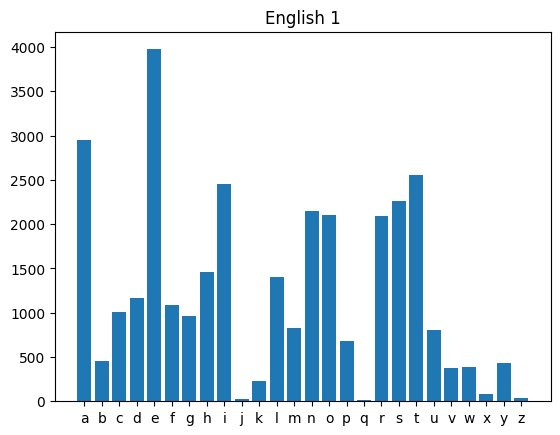

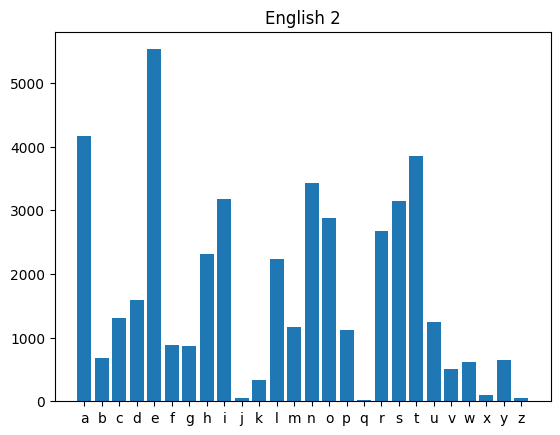

In [86]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()

unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

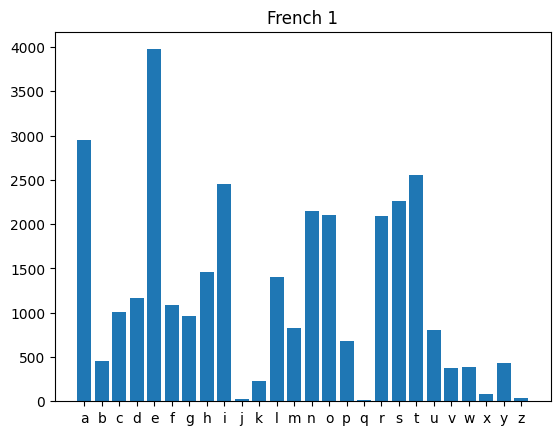

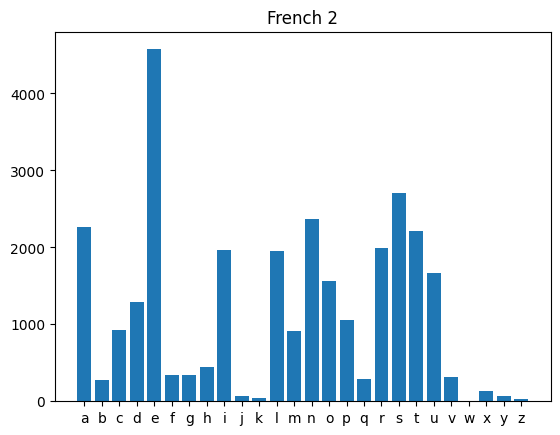

In [87]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()

unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar.

So this is not a good feature if we want to distinguish between English and French. ***Let us look at bigrams***

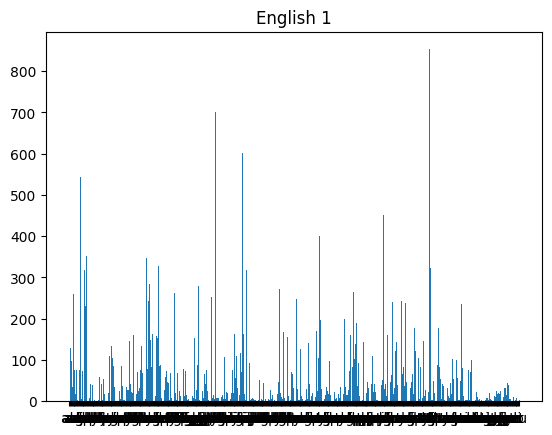

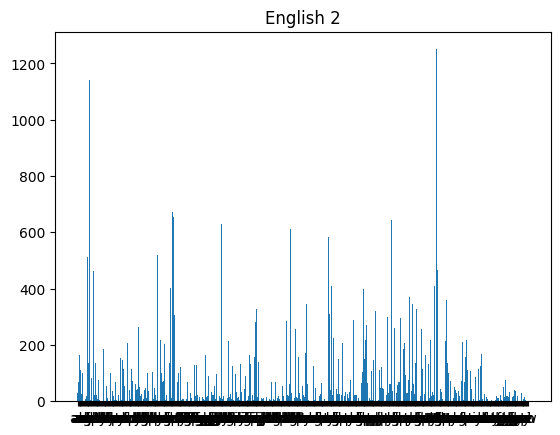

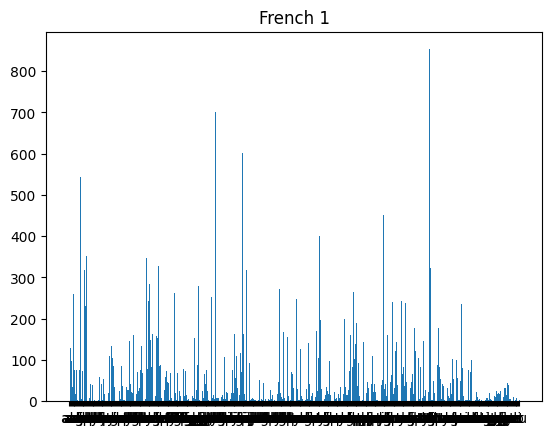

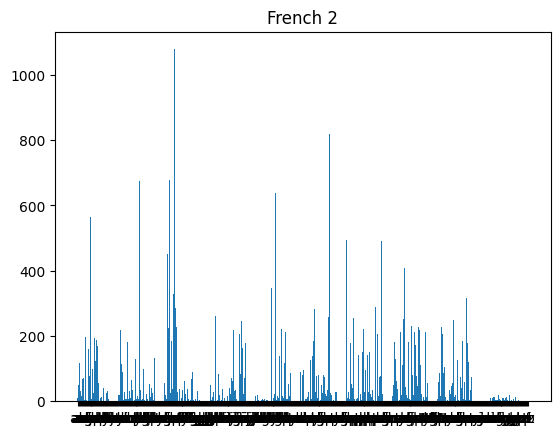

In [88]:
bigram_eng1 = Counter(ngrams(eng1,2)) # Bigram
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [89]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap='jet')
  return freq

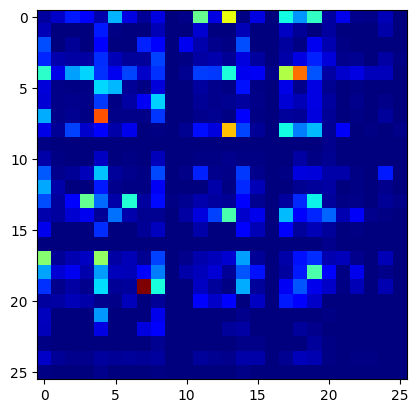

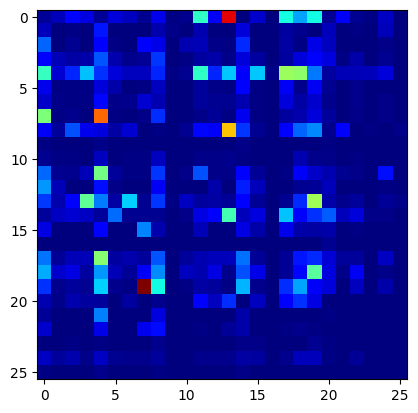

In [90]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

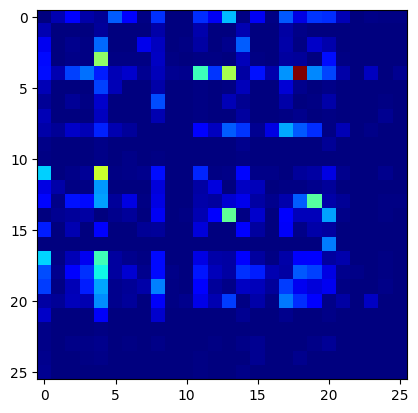

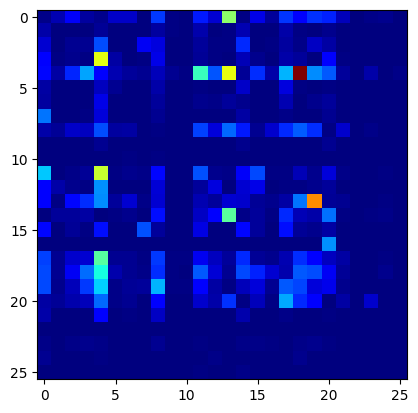

In [91]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [92]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26) # Row index
  j = int(ind%26) # Column index
  return (chr(ord('a')+ i), chr(ord('a') + j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [93]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 853.0
('h', 'e') : 700.0
('e', 's') : 674.0
('i', 'n') : 601.0
('a', 'n') : 543.0
('e', 'r') : 483.0
('r', 'e') : 452.0
('r', 'a') : 439.0
('a', 'l') : 406.0
('n', 'd') : 401.0

English 2:
('t', 'h') : 1250.0
('a', 'n') : 1140.0
('h', 'e') : 1000.0
('i', 'n') : 878.0
('n', 't') : 679.0
('e', 'r') : 673.0
('e', 's') : 653.0
('r', 'e') : 644.0
('h', 'a') : 628.0
('l', 'e') : 613.0

French 1:
('e', 's') : 791.0
('l', 'e') : 472.0
('e', 'n') : 438.0
('d', 'e') : 416.0
('o', 'n') : 370.0
('n', 't') : 359.0
('r', 'e') : 337.0
('e', 'l') : 335.0
('s', 'e') : 291.0
('r', 'a') : 265.0

French 2:
('e', 's') : 1078.0
('n', 't') : 819.0
('e', 'n') : 679.0
('d', 'e') : 675.0
('l', 'e') : 638.0
('a', 'n') : 564.0
('o', 'n') : 494.0
('r', 'e') : 490.0
('e', 'l') : 452.0
('s', 'e') : 408.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages. Lets take German

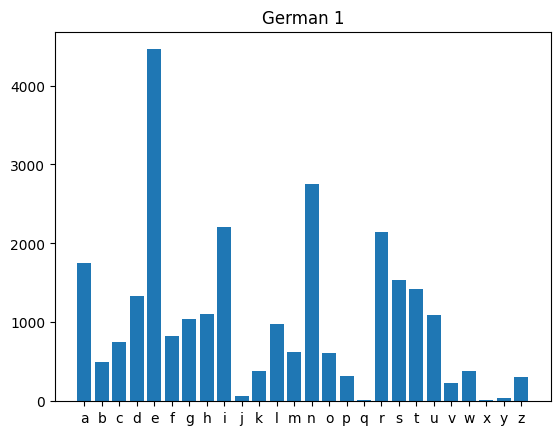

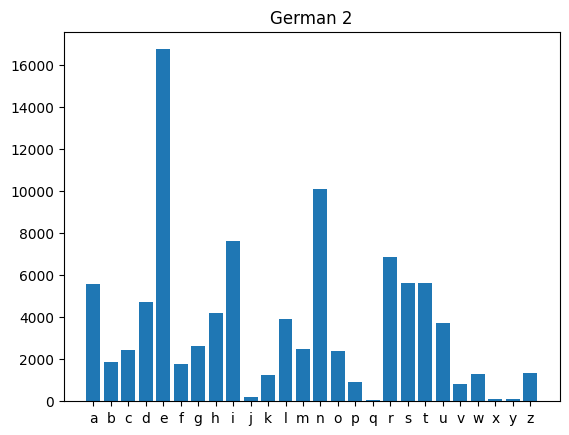

In [94]:
topic1 = 'Giraffee'
topic2 = 'Elephant'
wikipedia.set_lang('de')
ger1 = wikipedia.page(topic1).content
ger2 = wikipedia.page(topic2).content
ger1 = cleanup(ger1)
ger2 = cleanup(ger2)

# UNIGRAM
unigram_ger1 = Counter(ngrams(ger1,1))
plothistogram(unigram_ger1)
plt.title('German 1')
plt.show()
unigram_ger2 = Counter(ngrams(ger2,1))
plothistogram(unigram_ger2)
plt.title('German 2')
plt.show()

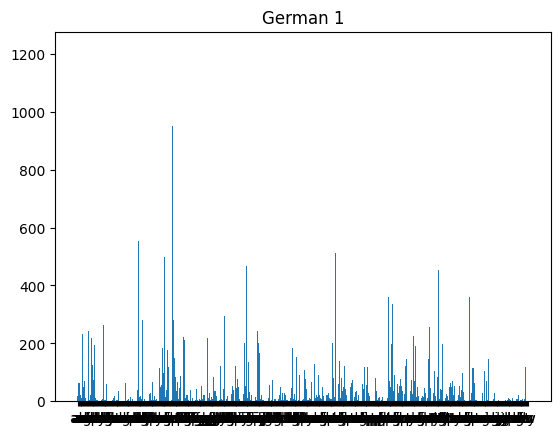

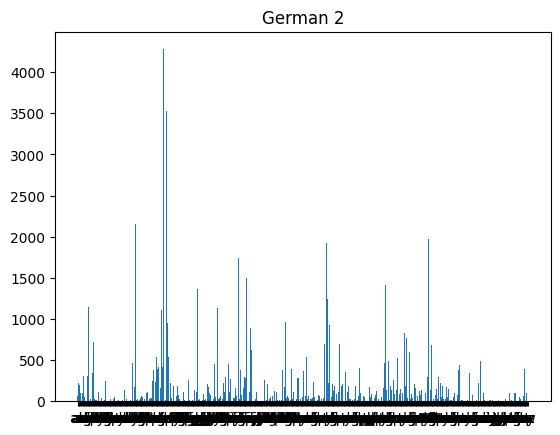

In [95]:
# BIGRAMS
bigram_ger1 = Counter(ngrams(ger1,2)) # bigrams
plothistogram(bigram_ger1)
plt.title('German 1')
plt.show()

bigram_ger2 = Counter(ngrams(ger2,2))
plothistogram(bigram_ger2)
plt.title('German 2')
plt.show()

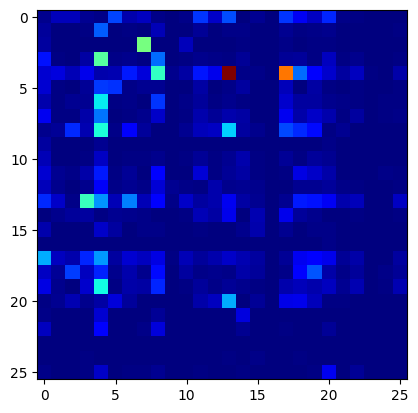

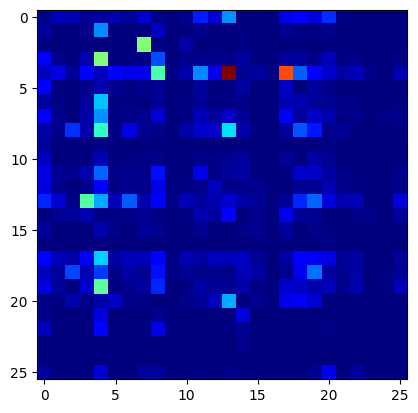

In [96]:
# BIHISTOGRAM
biger1 = plotbihistogram(bigram_ger1)
plt.show()
biger2 = plotbihistogram(bigram_ger2)

Bigram frequency for German :

In [97]:
print('\nGerman 1:')
ShowTopN(biger1)
print('\nGerman 2:')
ShowTopN(biger2)


German 1:
('e', 'n') : 1216.0
('e', 'r') : 952.0
('c', 'h') : 601.0
('d', 'e') : 553.0
('n', 'd') : 511.0
('e', 'i') : 499.0
('i', 'e') : 468.0
('t', 'e') : 455.0
('g', 'e') : 434.0
('i', 'n') : 402.0

German 2:
('e', 'n') : 4277.0
('e', 'r') : 3531.0
('c', 'h') : 2182.0
('d', 'e') : 2157.0
('t', 'e') : 1976.0
('n', 'd') : 1925.0
('e', 'i') : 1888.0
('i', 'e') : 1738.0
('i', 'n') : 1496.0
('r', 'e') : 1409.0


2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?

Lets use different topics in Wikipedia is two different languages (English & German) and use bigram frquency since its a good feature for distinguishing languages



Redefining plotbihistogram function :

In [98]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  # plt.imshow(freq, cmap = 'jet')
  return freq


English 1


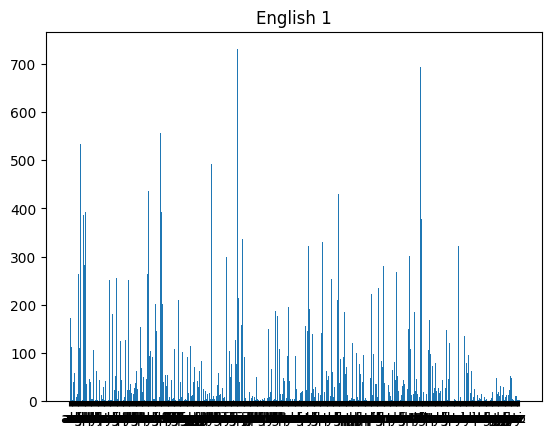

('i', 'n') : 730.0
('t', 'h') : 693.0
('e', 'r') : 557.0
('a', 'n') : 533.0
('h', 'e') : 492.0
('r', 'e') : 448.0
('e', 'd') : 437.0
('o', 'n') : 429.0
('d', 'i') : 406.0
('a', 't') : 392.0

English 2


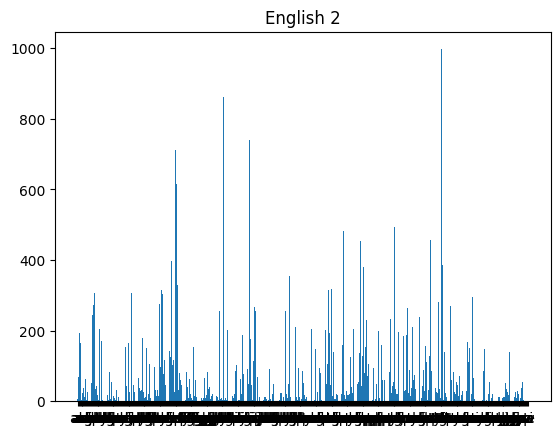

('t', 'h') : 997.0
('h', 'e') : 863.0
('i', 'n') : 739.0
('e', 'r') : 713.0
('e', 's') : 616.0
('r', 'e') : 494.0
('n', 't') : 482.0
('a', 'n') : 461.0
('s', 't') : 457.0
('o', 'n') : 453.0

German 1


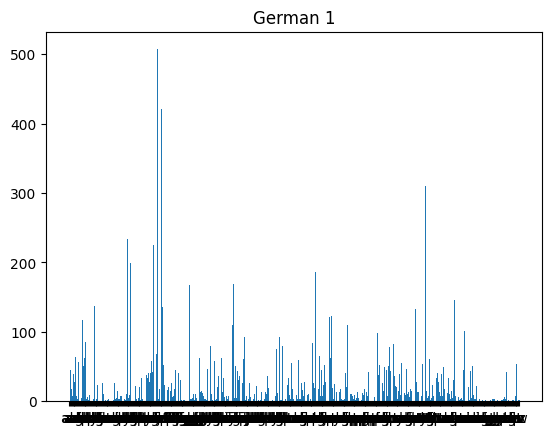

('e', 'n') : 507.0
('e', 'r') : 421.0
('t', 'e') : 310.0
('c', 'h') : 246.0
('d', 'e') : 234.0
('e', 'i') : 225.0
('d', 'i') : 199.0
('i', 'n') : 193.0
('n', 'd') : 186.0
('i', 'e') : 169.0
\German 2


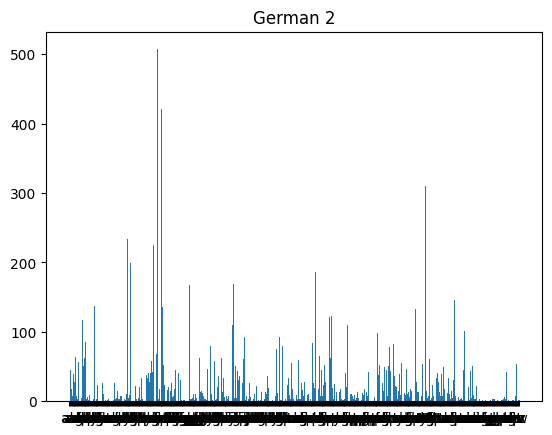

('e', 'r') : 1628.0
('e', 'n') : 1550.0
('c', 'h') : 1257.0
('d', 'e') : 1106.0
('e', 'i') : 986.0
('i', 'n') : 879.0
('n', 'd') : 867.0
('t', 'e') : 829.0
('i', 'e') : 778.0
('g', 'e') : 768.0


In [99]:
# Unable to use a different source
topic1 = "Nvdia"
topic2 = "Badminton"
wikipedia.set_lang('en')
en_tech = wikipedia.page(topic1).content
en_sport = wikipedia.page(topic2).content
wikipedia.set_lang('de')
de_tech = wikipedia.page(topic1).content
de_sport = wikipedia.page(topic2).content

ent = cleanup(en_tech)
ens = cleanup(en_sport)
det = cleanup(de_tech)
des = cleanup(de_sport)

print("\nEnglish 1")
bigram_ent = Counter(ngrams(ent,2))
plothistogram(bigram_ent)
plt.title("English 1")
plt.show()

bient = plotbihistogram(bigram_ent)
ShowTopN(bient)

print("\nEnglish 2")
bigram_ens = Counter(ngrams(ens,2))
plothistogram(bigram_ens)
plt.title("English 2")
plt.show()

biens = plotbihistogram(bigram_ens)
ShowTopN(biens)

print("\nGerman 1")
bigram_det = Counter(ngrams(det,2))
plothistogram(bigram_det)
plt.title("German 1")
plt.show()

bidet = plotbihistogram(bigram_det)
ShowTopN(bidet)

print("\German 2")
bigram_des = Counter(ngrams(des,2))
plothistogram(bigram_det)
plt.title("German 2")
plt.show()

bides = plotbihistogram(bigram_des)
ShowTopN(bides)

We are able to distinguish pretty clearly between these two languages using bigram frequency, but to distguish them between two topics in the same language, this is not that good of a feature, as we don't observe that many distinctive change between the both features obtained.

3. How can we use and visualize trigrams and higher n-grams?
One way to do it is use histograms itself

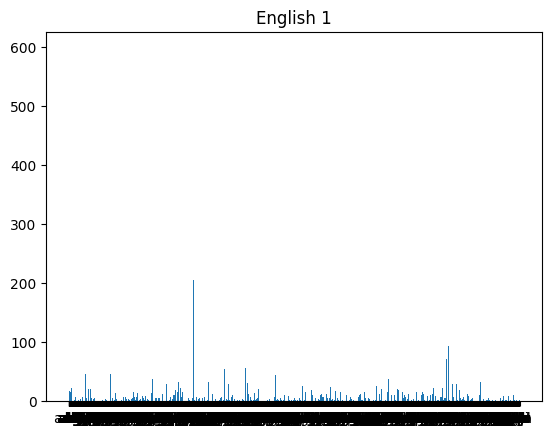

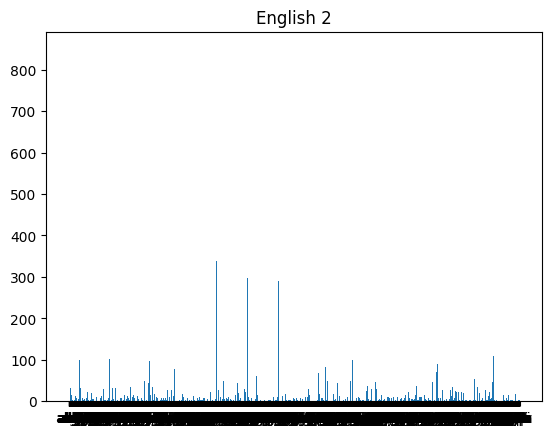

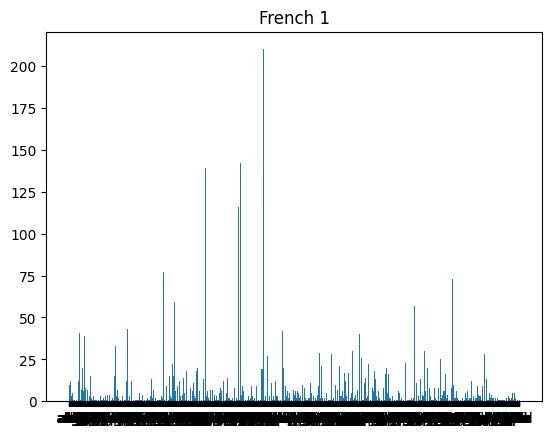

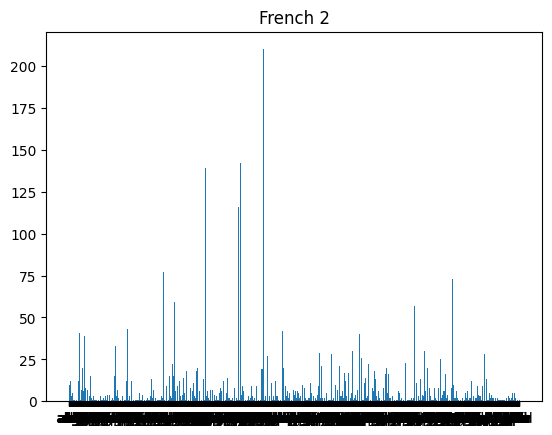

In [100]:
trigram_eng1 = Counter(ngrams(eng1,3))
trigram_eng2 = Counter(ngrams(eng2,3))
trigram_fr1 = Counter(ngrams(fr1,3))
trigram_fr2 = Counter(ngrams(fr2,3))

plothistogram(trigram_eng1)
plt.title("English 1")
plt.show()
plothistogram(trigram_eng2)
plt.title("English 2")
plt.show()
plothistogram(trigram_fr1)
plt.title("French 1")
plt.show()
plothistogram(trigram_fr1)
plt.title("French 2")
plt.show()

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [101]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment :

In [102]:
no1 = train_X[train_y==1,:,:] # image of 1, with full 28x28 dimensions
no0 = train_X[train_y==0,:,:] # image of 0, with full 28x28 dimensions

Let us visualize a few images here :

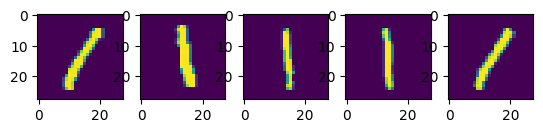

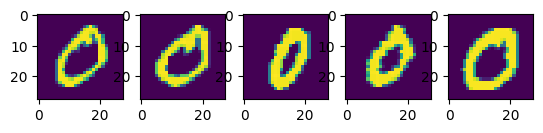

In [103]:
for ii in range(5):
  plt.subplot(1,5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1,5,ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

So now, let us start with a simple feature : The sum of all the pixels and see how it performs :

In [104]:
sum1 = np.sum(no1>0, (1,2)) # Threshold before adding up
sum0 = np.sum(no0>0, (1,2)) # (1,2) are the dimensions, while (1,2,3) would throw an error

Let's visualize this, and analyze how good the feature is : (X-axis - Mean, Y-axix - Digit)

(array([  49.,  339., 1102., 1679., 1630.,  778.,  274.,   62.,    8.,
           2.]),
 array([ 90. , 116.1, 142.2, 168.3, 194.4, 220.5, 246.6, 272.7, 298.8,
        324.9, 351. ]),
 <BarContainer object of 10 artists>)

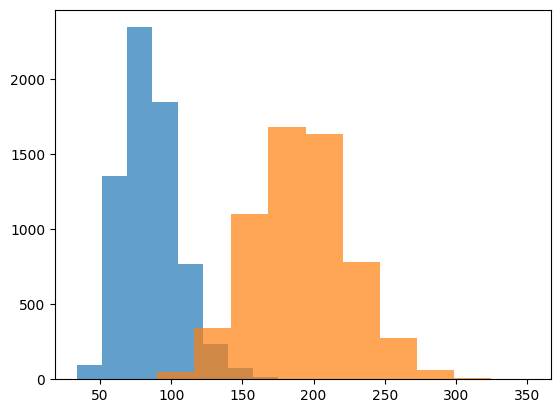

In [105]:
plt.hist(sum1, alpha=0.7)
plt.hist(sum0, alpha=0.7)

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels". ----

In [106]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:] # for every row, add up all the rows above it
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # Rotate and cumulate it again for different direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull = im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~(img>0) # this will create a binary image with all the holes filled in.
  return hole

Visualising a few

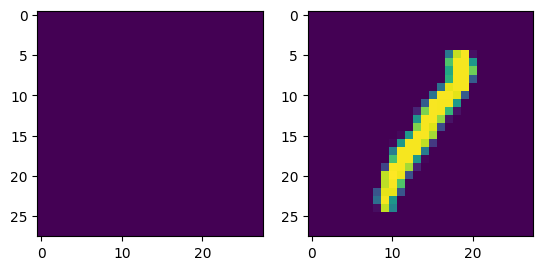

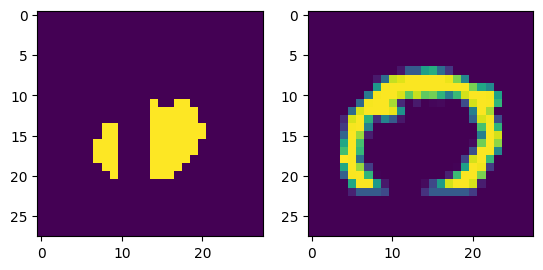

In [107]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

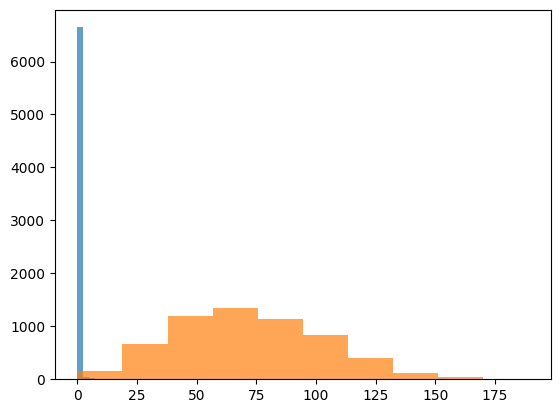

In [108]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [109]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

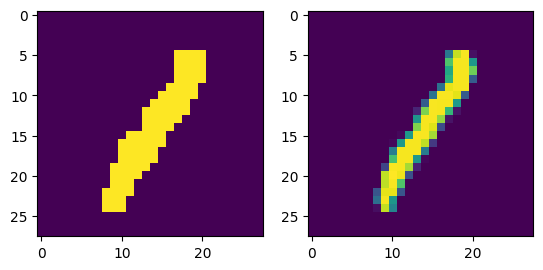

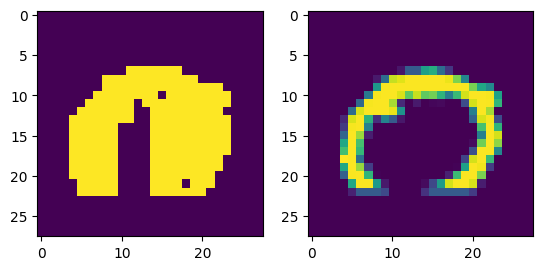

In [110]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

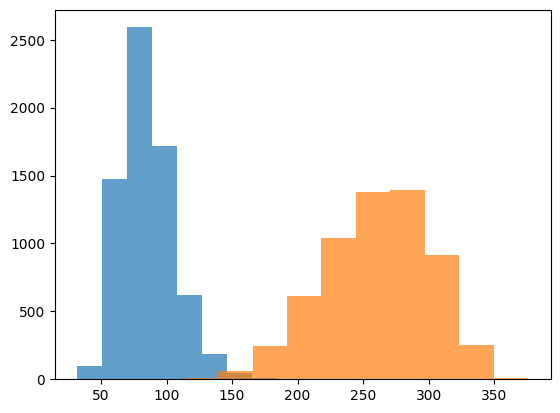

In [111]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [112]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

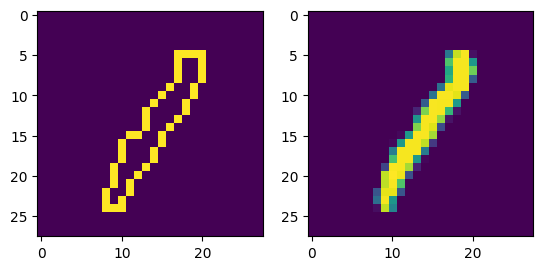

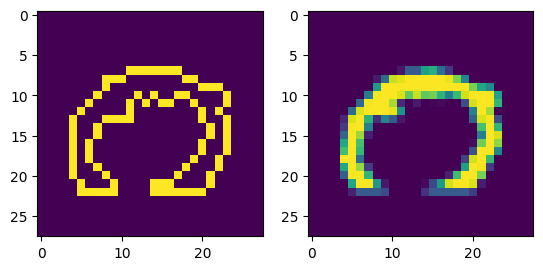

In [113]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

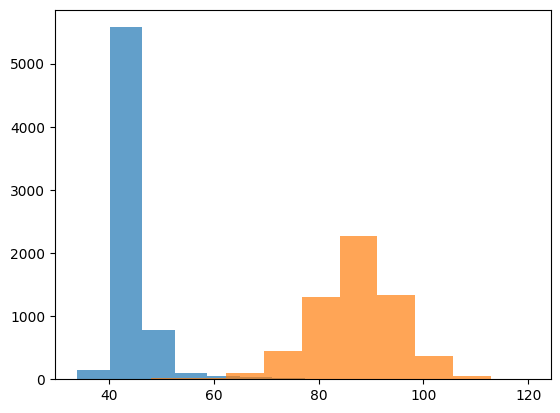

In [114]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

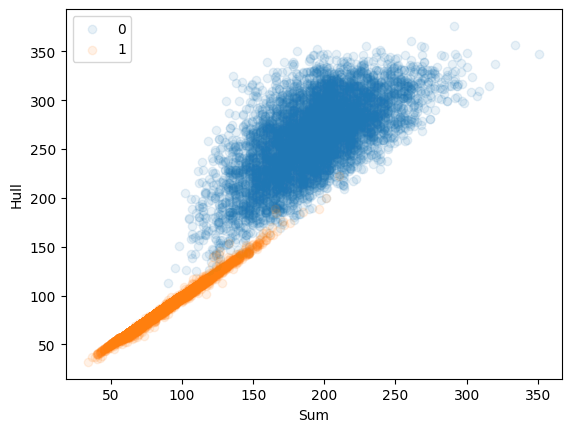

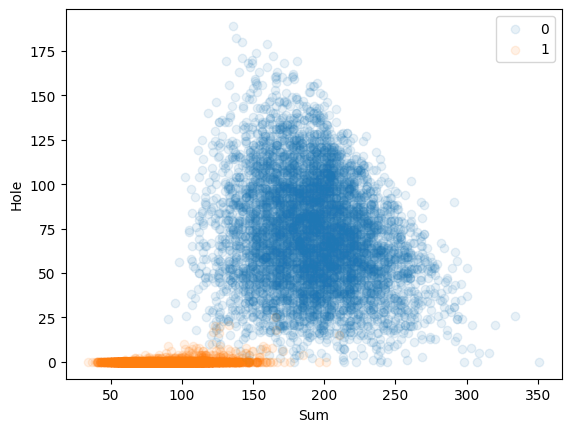

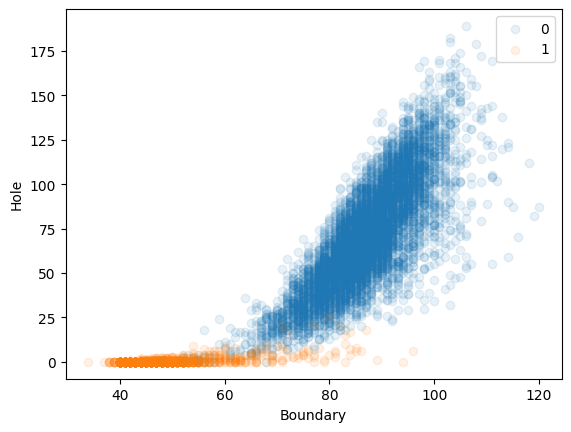

In [115]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [39]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?

   - From what we can see, the combination of boundary and hole pixels seem to be the most promising in distinguishing between the digits 0 and 1. Caputures both external and internal aspects of the digit, leading to a better seperation in the feature space.


2. How would you test or visualize four or more features?
  - Pairplot is good for 2-4 features
  - We can use dimensionality reduction techniques (PCA, t-SNE, UMAP) when the number of features are many.
  - Heatmaps : to understand correlations
  - Parallel Coordinates and Radar Plots : When comparing across classes with a manageable number of features.
  - I used Pairplot here & PCA later down

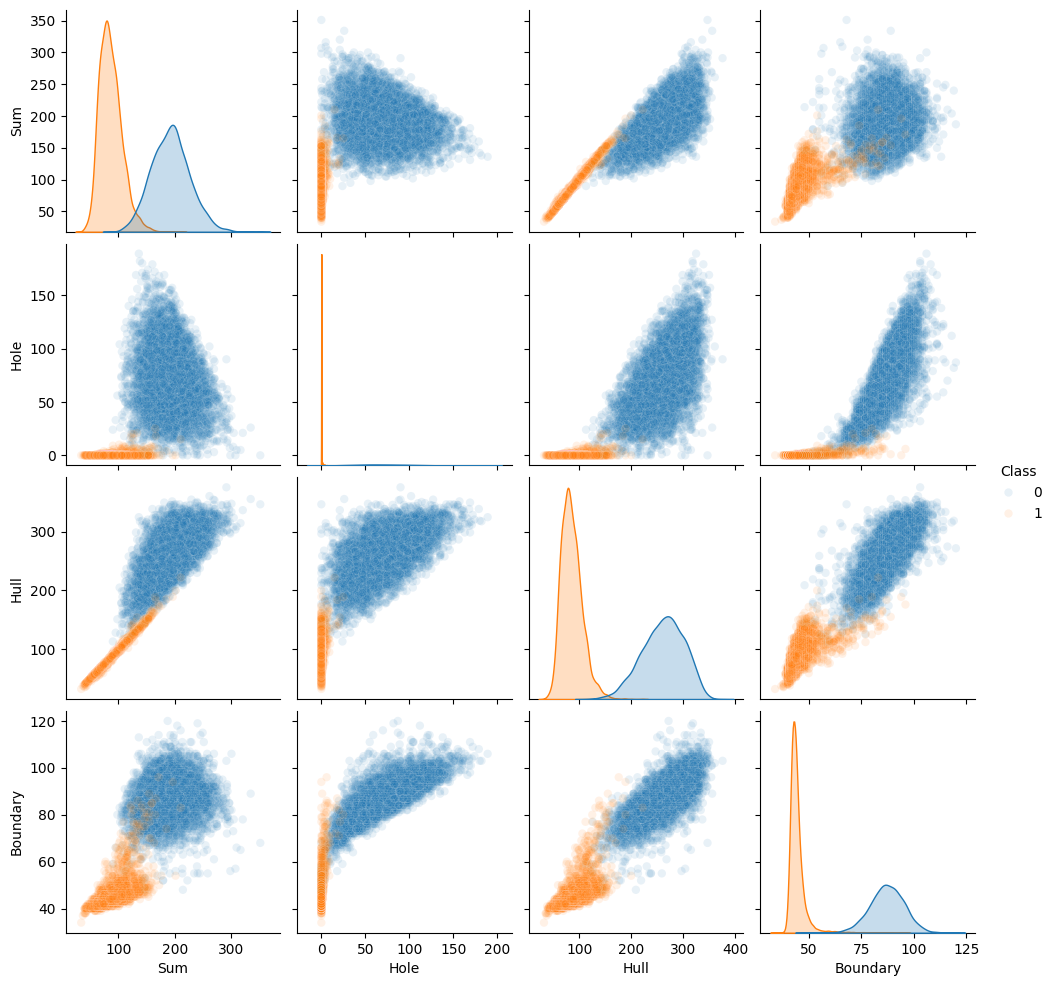

In [116]:
import seaborn as sns
sum1 = np.sum(no1 > 0, axis=(1, 2))
sum0 = np.sum(no0 > 0, axis=(1, 2))

hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0 = np.array([getBoundaryPixels(i).sum() for i in no0])

df = pd.DataFrame({
    'Sum': np.concatenate([sum0, sum1]),
    'Hole': np.concatenate([hole0, hole1]),
    'Hull': np.concatenate([hull0, hull1]),
    'Boundary': np.concatenate([bound0, bound1]),
    'Class': ['0'] * len(sum0) + ['1'] * len(sum1)
})

# Visualize using a pairplot
sns.pairplot(df, hue='Class', plot_kws={'alpha': 0.1})
plt.show()

3. Can you come up with your own features?
  - "Center of Mass" - It measures the average location of the non-zero pixels in an image, essentially telling us where the digit's mass is concentrated.

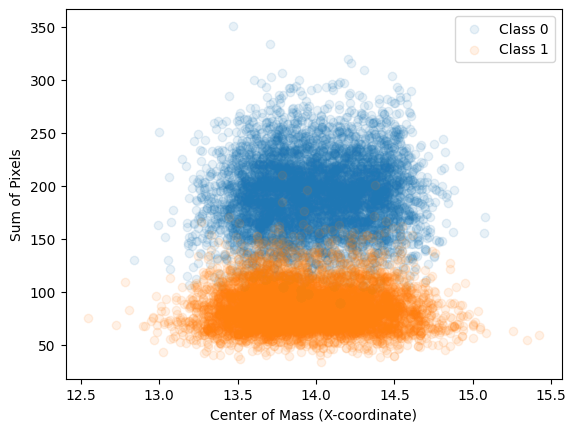

In [117]:
def calculate_center_of_mass(img):
    # Get the coordinates of non-zero pixels
    rows, cols = np.where(img > 0)

    # Calculate the average row and column positions (center of mass)
    if len(rows) > 0:
        row_mean = np.mean(rows)
        col_mean = np.mean(cols)
    else:
        row_mean, col_mean = 0, 0

    # Return the center of mass coordinates
    return row_mean, col_mean

center_mass1 = np.array([calculate_center_of_mass(i) for i in no1])
center_mass0 = np.array([calculate_center_of_mass(i) for i in no0])

center_mass1_x, center_mass1_y = center_mass1[:, 0], center_mass1[:, 1]
center_mass0_x, center_mass0_y = center_mass0[:, 0], center_mass0[:, 1]

plt.scatter(center_mass0_x, sum0, alpha=0.1, label='Class 0')
plt.scatter(center_mass1_x, sum1, alpha=0.1, label='Class 1')
plt.xlabel('Center of Mass (X-coordinate)')
plt.ylabel('Sum of Pixels')
plt.legend()
plt.show()

Visualising all the 5 features using PCA :

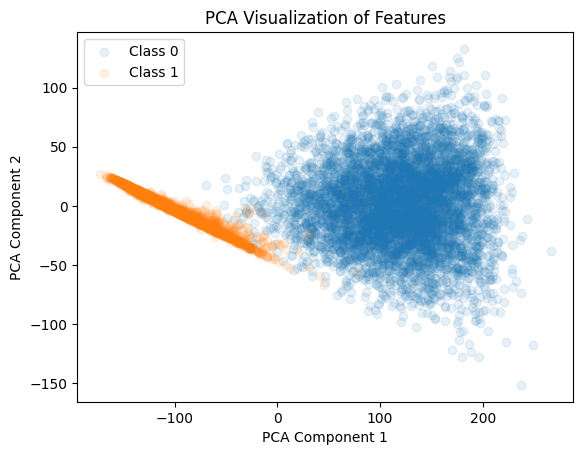

In [118]:
from sklearn.decomposition import PCA

# Combine the features into a single array
features1 = np.array([sum1, hole1, hull1, bound1, center_mass1[:, 0], center_mass1[:, 1]]).T
features0 = np.array([sum0, hole0, hull0, bound0, center_mass0[:, 0], center_mass0[:, 1]]).T

# Concatenate data from both classes for PCA
all_features = np.concatenate((features0, features1), axis=0)
labels = np.array(['Class 0'] * len(features0) + ['Class 1'] * len(features1))

# Perform PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
features_2d = pca.fit_transform(all_features)

plt.scatter(features_2d[labels == 'Class 0', 0], features_2d[labels == 'Class 0', 1], alpha=0.1, label='Class 0')
plt.scatter(features_2d[labels == 'Class 1', 0], features_2d[labels == 'Class 1', 1], alpha=0.1, label='Class 1')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('PCA Visualization of Features')
plt.show()

4. Will these features work for different classes other than 0 and 1?
  - These features aren't working for other classes as we can see 2 & 3 here.

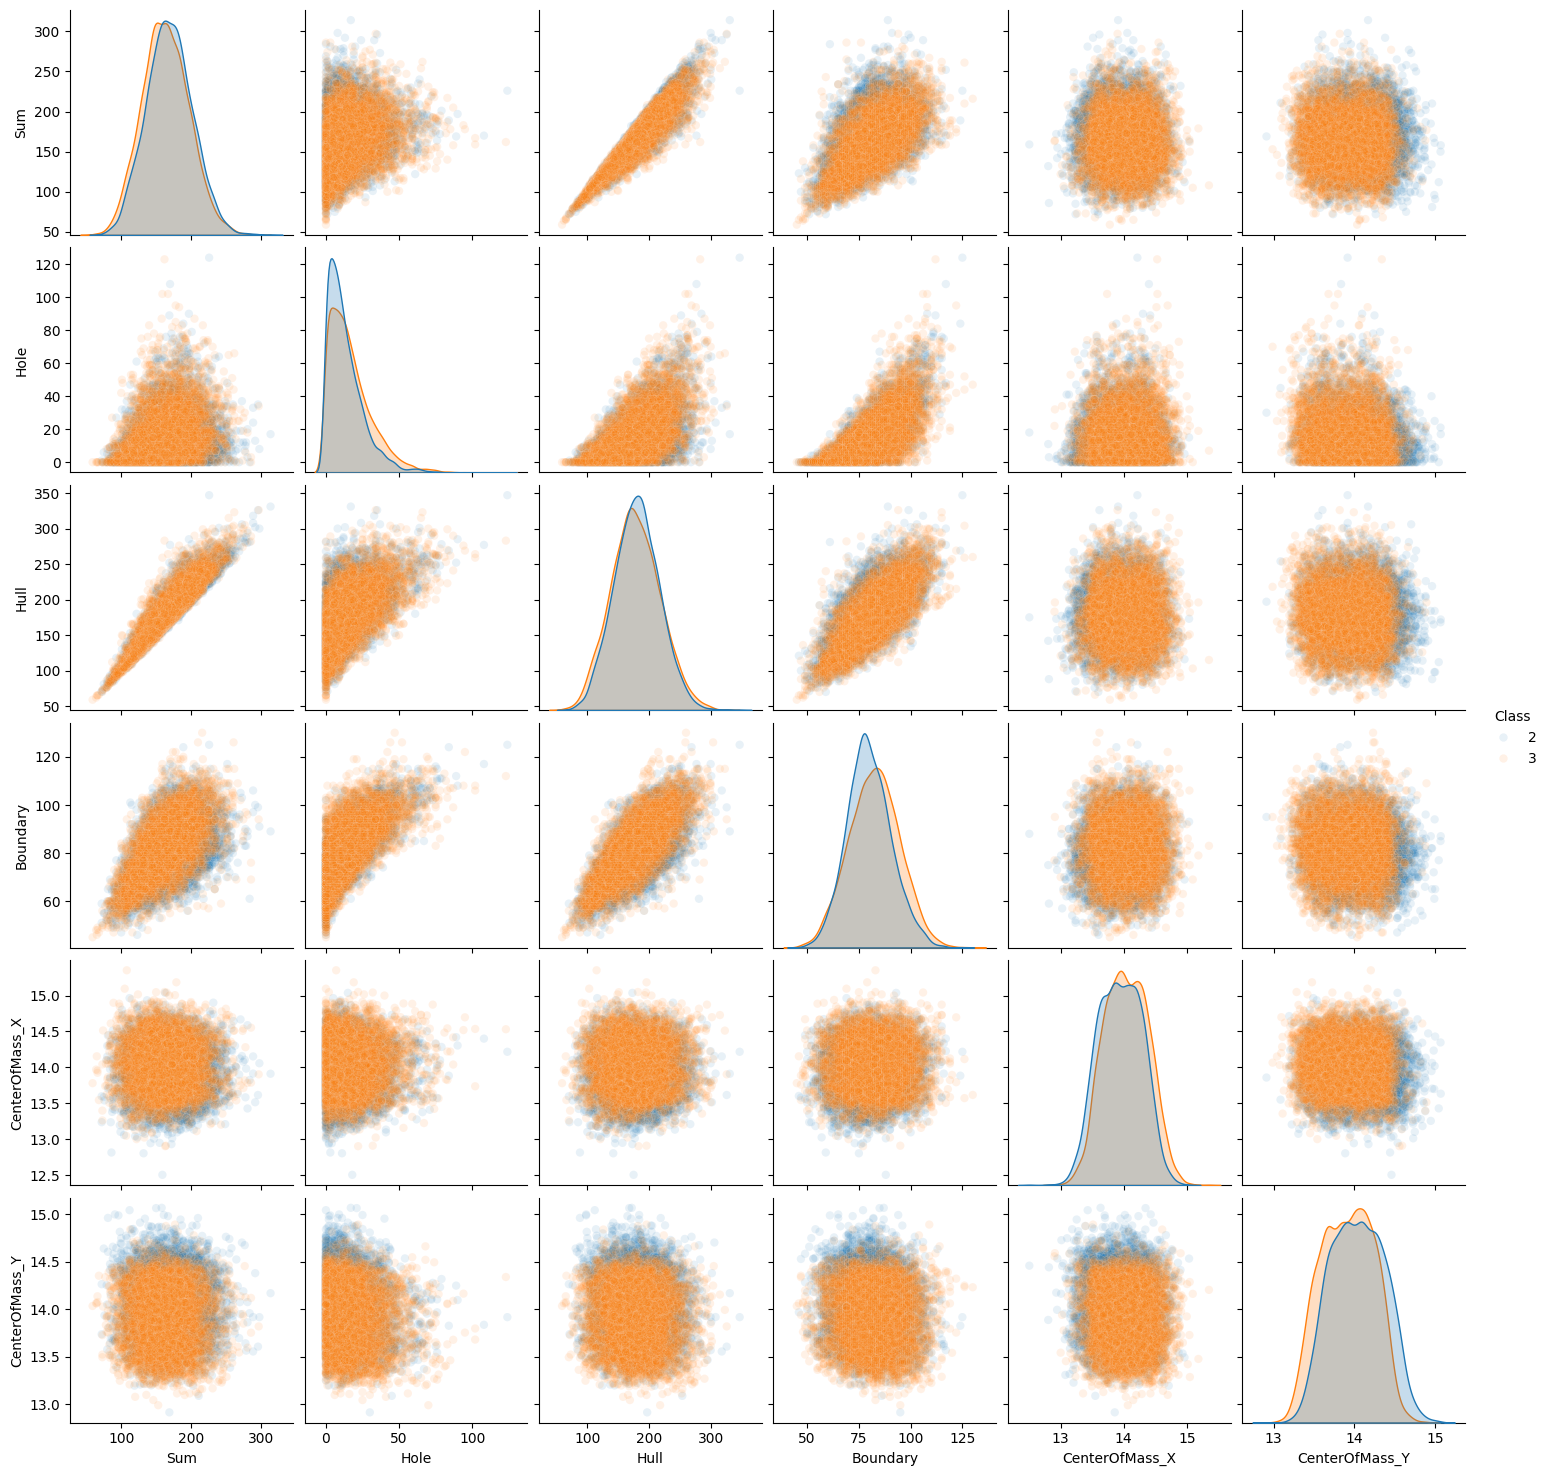

In [119]:
no2 = train_X[train_y == 2]
no3 = train_X[train_y == 3]

sum2 = np.sum(no2 > 0, axis=(1, 2))
sum3 = np.sum(no3 > 0, axis=(1, 2))

hole2 = np.array([getHolePixels(i).sum() for i in no2])
hole3 = np.array([getHolePixels(i).sum() for i in no3])

hull2 = np.array([getHullPixels(i).sum() for i in no2])
hull3 = np.array([getHullPixels(i).sum() for i in no3])

bound2 = np.array([getBoundaryPixels(i).sum() for i in no2])
bound3 = np.array([getBoundaryPixels(i).sum() for i in no3])

center_mass2 = np.array([calculate_center_of_mass(i) for i in no2])
center_mass3 = np.array([calculate_center_of_mass(i) for i in no3])

df = pd.DataFrame({
    'Sum': np.concatenate([sum2, sum3]),
    'Hole': np.concatenate([hole2, hole3]),
    'Hull': np.concatenate([hull2, hull3]),
    'Boundary': np.concatenate([bound2, bound3]),
    'CenterOfMass_X': np.concatenate([center_mass2[:, 0], center_mass3[:, 0]]),
    'CenterOfMass_Y': np.concatenate([center_mass2[:, 1], center_mass3[:, 1]]),
    'Class': ['2'] * len(sum2) + ['3'] * len(sum3)
})

# Visualize using a pairplot
sns.pairplot(df, hue='Class', plot_kws={'alpha': 0.1})
plt.show()

Using PCA :

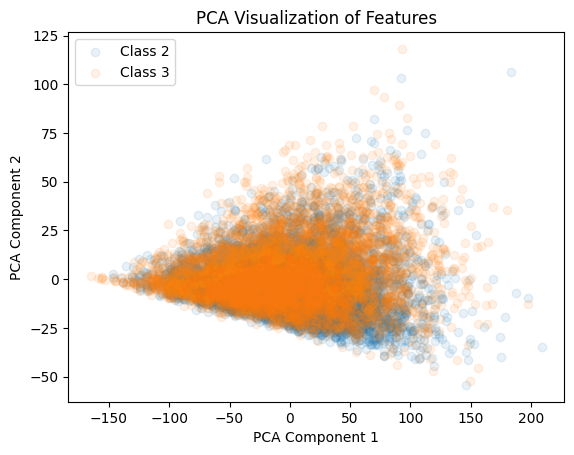

In [120]:
features2 = np.array([sum2, hole2, hull2, bound2, center_mass2[:, 0], center_mass2[:, 1]]).T
features3 = np.array([sum3, hole3, hull3, bound3, center_mass3[:, 0], center_mass3[:, 1]]).T

all_features = np.concatenate((features2, features3), axis=0)
labels = np.array(['Class 2'] * len(features2) + ['Class 3'] * len(features3))

pca = PCA(n_components=2)
features_2d = pca.fit_transform(all_features)

plt.scatter(features_2d[labels == 'Class 2', 0], features_2d[labels == 'Class 2', 1], alpha=0.1, label='Class 2')
plt.scatter(features_2d[labels == 'Class 3', 0], features_2d[labels == 'Class 3', 1], alpha=0.1, label='Class 3')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('PCA Visualization of Features')
plt.show()

5. What will happen if we take more that two classes at a time?
  - taking 0, 1, 2 at the same time :

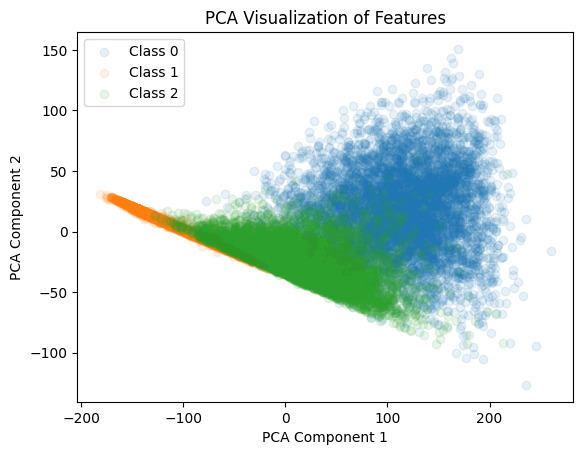

In [121]:
features1 = np.array([sum1, hole1, hull1, bound1, center_mass1[:, 0], center_mass1[:, 1]]).T
features0 = np.array([sum0, hole0, hull0, bound0, center_mass0[:, 0], center_mass0[:, 1]]).T
features2 = np.array([sum2, hole2, hull2, bound2, center_mass2[:, 0], center_mass2[:, 1]]).T

all_features = np.concatenate((features0, features1, features2), axis=0)
labels = np.array(['Class 0'] * len(features0) + ['Class 1'] * len(features1) + ['Class 2'] * len(features2))

pca = PCA(n_components=2)
features_2d = pca.fit_transform(all_features)

plt.scatter(features_2d[labels == 'Class 0', 0], features_2d[labels == 'Class 0', 1], alpha=0.1, label='Class 0')
plt.scatter(features_2d[labels == 'Class 1', 0], features_2d[labels == 'Class 1', 1], alpha=0.1, label='Class 1')
plt.scatter(features_2d[labels == 'Class 2', 0], features_2d[labels == 'Class 2', 1], alpha=0.1, label='Class 2')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('PCA Visualization of Features')
plt.show()